In [1]:
!pip install apriori

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install mlxtend
from mlxtend.frequent_patterns import apriori

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
data=pd.read_csv('F:\BreadBasket_DMS - Arindam Dev.csv')

In [5]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [6]:
data.shape

(21293, 4)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [8]:
data.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [9]:
data.nunique()

Date            159
Time           8240
Transaction    9531
Item             95
dtype: int64

In [10]:
data[data['Transaction']<0].head()

,Date,Time,Transaction,Item


# Feature Engineering

In [11]:
data['Date']=pd.to_datetime(data["Date"],errors='coerce')
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month

In [12]:
data['Time']=pd.to_datetime(data['Time'],errors='coerce')
data['Hour']=data['Time'].dt.hour
data.head()

,Date,Time,Transaction,Item,Year,Month,Hour
0,2016-10-30,2020-11-01 09:58:11,1,Bread,2016,10,9
1,2016-10-30,2020-11-01 10:05:34,2,Scandinavian,2016,10,10
2,2016-10-30,2020-11-01 10:05:34,2,Scandinavian,2016,10,10
3,2016-10-30,2020-11-01 10:07:57,3,Hot chocolate,2016,10,10
4,2016-10-30,2020-11-01 10:07:57,3,Jam,2016,10,10


In [13]:
data['Month_Year']=pd.to_datetime(data["Date"]).dt.to_period("M")
data.head()

,Date,Time,Transaction,Item,Year,Month,Hour,Month_Year
0,2016-10-30,2020-11-01 09:58:11,1,Bread,2016,10,9,2016-10
1,2016-10-30,2020-11-01 10:05:34,2,Scandinavian,2016,10,10,2016-10
2,2016-10-30,2020-11-01 10:05:34,2,Scandinavian,2016,10,10,2016-10
3,2016-10-30,2020-11-01 10:07:57,3,Hot chocolate,2016,10,10,2016-10
4,2016-10-30,2020-11-01 10:07:57,3,Jam,2016,10,10,2016-10


# Exploratory Analysis

In [14]:
data.describe()

,Transaction,Year,Month,Hour
count,21293.000000,21293.000000,21293.000000,21293.000000
mean,4951.990889,2016.597943,5.904898,12.254919
std,2787.758400,0.490325,4.557956,2.322976
min,1.000000,2016.000000,1.000000,1.000000
25%,2548.000000,2016.000000,2.000000,10.000000
50%,5067.000000,2017.000000,3.000000,12.000000
75%,7329.000000,2017.000000,11.000000,14.000000
max,9684.000000,2017.000000,12.000000,23.000000


In [15]:
data[data['Transaction']>100].head()

,Date,Time,Transaction,Item,Year,Month,Hour,Month_Year
223,2016-10-31,2020-11-01 10:04:02,101,Coffee,2016,10,10,2016-10
224,2016-10-31,2020-11-01 10:04:02,101,Pastry,2016,10,10,2016-10
225,2016-10-31,2020-11-01 10:04:44,102,Farm House,2016,10,10,2016-10
226,2016-10-31,2020-11-01 10:07:40,103,NONE,2016,10,10,2016-10
227,2016-10-31,2020-11-01 10:07:40,103,Bread,2016,10,10,2016-10


In [16]:
products = data['Item'].nunique()
products

95

In [17]:
data['Item'].value_counts().head(20)

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Name: Item, dtype: int64

In [18]:
data[data['Item']=='Coffee'].head()

,Date,Time,Transaction,Item,Year,Month,Hour,Month_Year
7,2016-10-30,2020-11-01 10:13:03,5,Coffee,2016,10,10,2016-10
15,2016-10-30,2020-11-01 10:19:12,7,Coffee,2016,10,10,2016-10
28,2016-10-30,2020-11-01 10:30:14,12,Coffee,2016,10,10,2016-10
34,2016-10-30,2020-11-01 10:31:24,13,Coffee,2016,10,10,2016-10
44,2016-10-30,2020-11-01 10:37:08,16,Coffee,2016,10,10,2016-10


In [19]:
most_sold_item=data['Item'].value_counts().head(20)
most_sold_item

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Name: Item, dtype: int64

# Montly Transaction 

In [20]:
data.groupby(['Month_Year'])['Transaction'].sum()

Month_Year
2016-10       33333
2016-11     5864423
2016-12    11574193
2017-01    17233990
2017-02    26167960
2017-03    33356449
2017-04    11212394
Freq: M, Name: Transaction, dtype: int64

Text(0.5, 1.0, 'Items Most Sold')

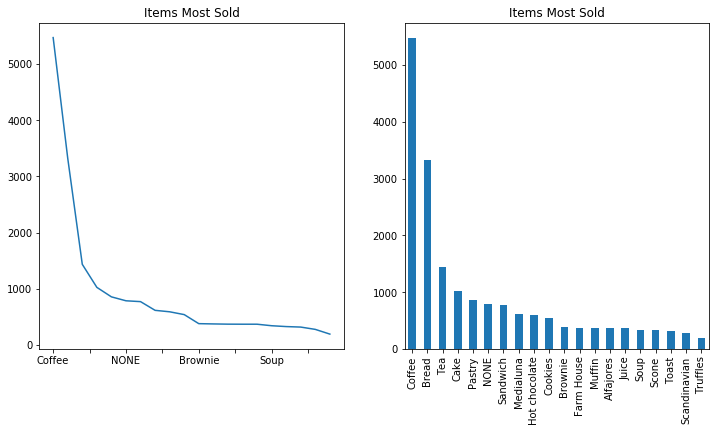

In [22]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold_item.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold_item.plot(kind='bar')
plt.title('Items Most Sold')

In [23]:
from mlxtend.preprocessing import TransactionEncoder

In [29]:
transaction_list=[]

for i in data['Transaction'].unique():
    tlist=list(set(data[data["Transaction"]==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
        
print(len(transaction_list))

9531


In [38]:
te=TransactionEncoder()
te_ary=te.fit(transaction_list).transform(transaction_list)
df=pd.DataFrame(te_ary,columns=te.columns_)
df

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9528,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9529,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
freq_item_sets=apriori(df,min_support=0.01,use_colnames=True)
rules=association_rules(freq_item_sets,metric='lift',min_threshold=1.0)
rules.sort_values('confidence',ascending=False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
30,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
19,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
24,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
16,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
22,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
27,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
6,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
29,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


In [42]:
rules[(rules['lift'] >= 1) &
       (rules['confidence'] >= 0.05) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
2,(Pastry),(Bread),0.085510,0.324940,0.028958,0.338650,1.042194,0.001172,1.020731
3,(Bread),(Pastry),0.324940,0.085510,0.028958,0.089119,1.042194,0.001172,1.003961
5,(Brownie),(Coffee),0.039765,0.475081,0.019515,0.490765,1.033013,0.000624,1.030799
6,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
7,(Coffee),(Cake),0.475081,0.103137,0.054349,0.114399,1.109196,0.005350,1.012717
8,(Cake),(Hot chocolate),0.103137,0.057916,0.011331,0.109868,1.897010,0.005358,1.058364
9,(Hot chocolate),(Cake),0.057916,0.103137,0.011331,0.195652,1.897010,0.005358,1.115019
10,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
11,(Tea),(Cake),0.141643,0.103137,0.023607,0.166667,1.615972,0.008999,1.076235
